In [1]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence  # newly learnt this time!

#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef

#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm


plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
sns.set(font_scale = 1)  
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

print("Let's start!")

Let's start!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [3]:
data = pd.read_csv("Breast Cancer_Data.csv")
data.head(10)

,RM,TM,PM,AM,SM,CM,CVM,CPM,STM,FDM,RS,TS,PS,AS,SS,CS,CVS,CPS,SMS,FDS,RW,TW,PW,AW,SW,CW,CVW,CPW,SWI,FDW,BC
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,M


In [4]:
from sklearn.preprocessing import LabelEncoder
data.loc[data["BC"] == "B","BC"] = 0
data.loc[data["BC"] == "M","BC"] = 1

#convert x axis data to int value
lb = LabelEncoder() 
data['BC'] = lb.fit_transform(data['BC'])

In [5]:
data.head(10)

,RM,TM,PM,AM,SM,CM,CVM,CPM,STM,FDM,RS,TS,PS,AS,SS,CS,CVS,CPS,SMS,FDS,RW,TW,PW,AW,SW,CW,CVW,CPW,SWI,FDW,BC
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1


In [6]:
#lets describe the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RM,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
TM,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
PM,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
AM,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
SM,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
CM,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
CVM,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
CPM,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
STM,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
FDM,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
data['BC'].value_counts()

BC
0    357
1    212
Name: count, dtype: int64

In [8]:
# #let's visualize this
# plt.figure(figsize=(10,5))
# sns.heatmap(data.isnull(),yticklabels= False)
# plt.title("Visualization of Missing Values")
# plt.show()

In [9]:
# data.plot(color = 'g', kind='box', figsize=(25, 15), subplots=True, layout=(8,5))
# plt.show()

In [10]:
data_boxcox = data.copy()
X = data_boxcox.drop(["BC"],axis=1)
Y = data_boxcox["BC"]

In [11]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.BC==0]
df_minority = data_bal[data_bal.BC==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=True,n_samples=230,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.BC.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=345,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.BC.value_counts())

Downsampled data:->
 BC
0    230
1    212
Name: count, dtype: int64
Upsampled data:->
 BC
0    357
1    345
Name: count, dtype: int64


In [12]:
#classes = ["0", "1","2","3","4","5","6"]
X = df_upsampled.drop(['BC'],axis=1)
Y = df_upsampled['BC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [13]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import itertools
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [14]:
display(df_upsampled.shape, df_upsampled.head())

(702, 31)

,RM,TM,PM,AM,SM,CM,CVM,CPM,STM,FDM,RS,TS,PS,AS,SS,CS,CVS,CPS,SMS,FDS,RW,TW,PW,AW,SW,CW,CVW,CPW,SWI,FDW,BC
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [15]:
df_info = DataFrameSummary(df_upsampled)
df_info.summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
RM,702.0,14.707135,3.745236,6.981,11.94,13.85,17.125,28.11,702,424,0,0%,numeric
TM,702.0,19.788689,4.288005,9.71,16.84,19.525,22.15,39.28,702,449,0,0%,numeric
PM,702.0,96.11198,25.7729,43.79,77.345,89.91,111.75,188.5,702,488,0,0%,numeric
AM,702.0,712.802849,385.500917,143.5,440.7,593.95,926.3,2501.0,702,504,0,0%,numeric
SM,702.0,0.097893,0.014453,0.05263,0.087532,0.09752,0.10655,0.1634,702,446,0,0%,numeric
CM,702.0,0.113891,0.05752,0.01938,0.070795,0.10385,0.1441,0.3454,702,499,0,0%,numeric
CVM,702.0,0.103646,0.084678,0.0,0.034827,0.08625,0.152125,0.4264,702,498,0,0%,numeric
CPM,702.0,0.056889,0.041021,0.0,0.023168,0.049445,0.08646,0.1878,702,501,0,0%,numeric
STM,702.0,0.183697,0.027657,0.106,0.1638,0.1812,0.19755,0.304,702,406,0,0%,numeric
FDM,702.0,0.063,0.007854,0.04996,0.05724,0.06166,0.06672,0.09744,702,464,0,0%,numeric


In [16]:
# Or customize according to what you'd like to know.

df_info2 = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_unique'])

for i in range(0, len(df_upsampled.columns)):
    df_info2.loc[i] = [df_upsampled.columns[i],
                      df_upsampled[df_upsampled.columns[i]].isnull().sum(),
                      df_upsampled[df_upsampled.columns[i]].dtypes,
                      df_upsampled[df_upsampled.columns[i]].nunique()]
    
df_info2

,Name of Col,Num of Null,Dtype,N_unique
0,RM,0,float64,424
1,TM,0,float64,449
2,PM,0,float64,488
3,AM,0,float64,504
4,SM,0,float64,446
5,CM,0,float64,499
6,CVM,0,float64,498
7,CPM,0,float64,501
8,STM,0,float64,406
9,FDM,0,float64,464


In [17]:
dtype = pd.DataFrame(df_info.summary().loc['types'] == 'numeric')
num_cols = dtype[dtype['types'] == True].index.to_list()
num_cols

['RM',
 'TM',
 'PM',
 'AM',
 'SM',
 'CM',
 'CVM',
 'CPM',
 'STM',
 'FDM',
 'RS',
 'TS',
 'PS',
 'AS',
 'SS',
 'CS',
 'CVS',
 'CPS',
 'SMS',
 'FDS',
 'RW',
 'TW',
 'PW',
 'AW',
 'SW',
 'CW',
 'CVW',
 'CPW',
 'SWI',
 'FDW']

In [18]:
cat_cols = list(set(df_upsampled.columns) - set(num_cols))
cat_cols.remove('BC')

cat_cols

[]

In [19]:
#!pip install scipy==1.11.4 --user

In [20]:
import pycaret
from pycaret.classification import *

In [21]:
setup(data = df_upsampled, 
      target = 'BC',
      session_id = 42,
      preprocess = True,
      index=False,
      numeric_features = cat_cols
     )
#       silent = True

,Description,Value
0,Session id,42
1,Target,BC
2,Target type,Binary
3,Original data shape,"(1238, 31)"
4,Transformed data shape,"(1238, 31)"
5,Transformed train set shape,"(866, 31)"
6,Transformed test set shape,"(372, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [22]:
top5 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9919,0.9996,0.9951,0.9936,0.9943,0.9803,0.9805,0.0450
rf,Random Forest Classifier,0.9885,0.9993,0.9984,0.9856,0.9919,0.9716,0.9719,0.0660
ada,Ada Boost Classifier,0.9885,0.9994,0.9935,0.9904,0.9919,0.9718,0.9720,0.0480
lightgbm,Light Gradient Boosting Machine,0.9885,0.9993,0.9951,0.9888,0.9919,0.9717,0.9720,0.1060
gbc,Gradient Boosting Classifier,0.9838,0.9984,0.9902,0.9871,0.9886,0.9607,0.9610,0.1420
catboost,CatBoost Classifier,0.9838,0.9995,0.9951,0.9826,0.9887,0.9601,0.9607,4.2390
dt,Decision Tree Classifier,0.9827,0.9759,0.9919,0.9840,0.9879,0.9575,0.9579,0.0080
xgboost,Extreme Gradient Boosting,0.9815,0.9990,0.9886,0.9854,0.9870,0.9550,0.9551,0.0840
qda,Quadratic Discriminant Analysis,0.9781,0.9934,0.9837,0.9855,0.9845,0.9469,0.9475,0.0110
lr,Logistic Regression,0.9665,0.9930,0.9756,0.9773,0.9764,0.9187,0.9192,0.7840


## 1. Stacking with Random Base Models

In [23]:
stacking_rbm= stack_models(estimator_list = [knn, dt, et, gbc, ada], meta_model = svm())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9770,0.9994,0.9839,0.9839,0.9839,0.9439,0.9439
1,0.9885,1.0000,1.0000,0.9841,0.9920,0.9716,0.9720
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9885,1.0000,1.0000,0.9841,0.9920,0.9716,0.9720
4,0.9770,0.9994,0.9839,0.9839,0.9839,0.9439,0.9439
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9884,1.0000,1.0000,0.9839,0.9919,0.9715,0.9719
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9651,0.9974,0.9672,0.9833,0.9752,0.9164,0.9168


In [24]:
evaluate_model(stacking_rbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [25]:
# # !pip install shapely
# !pip install shap

In [26]:
import shap
shap.initjs()

In [27]:
explainer=shap.Explainer(stacking_rbm)
shap_values=explainer(X_test)

In [28]:
np.shape(shap_values.values)

(211, 30)

#### 1. Waterfall Plot

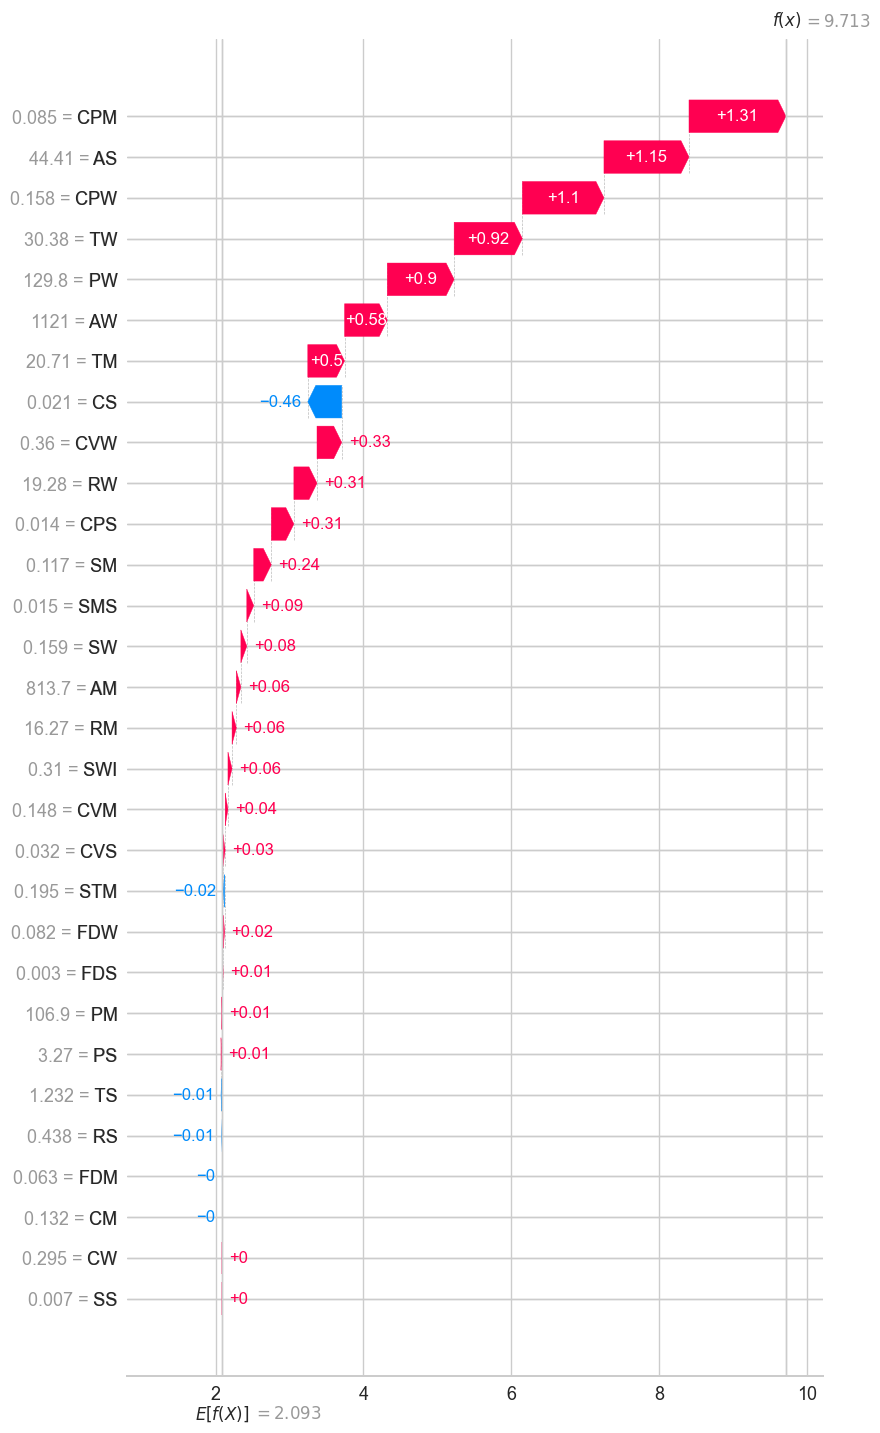

In [29]:
shap.plots.waterfall(shap_values[0], max_display=len(shap_values.feature_names))

#### 2. Force Plot 

In [30]:
shap.plots.force(shap_values[0])

In [31]:
shap.plots.force(shap_values[0:100])

#### 3. Absolute Mean Shap 

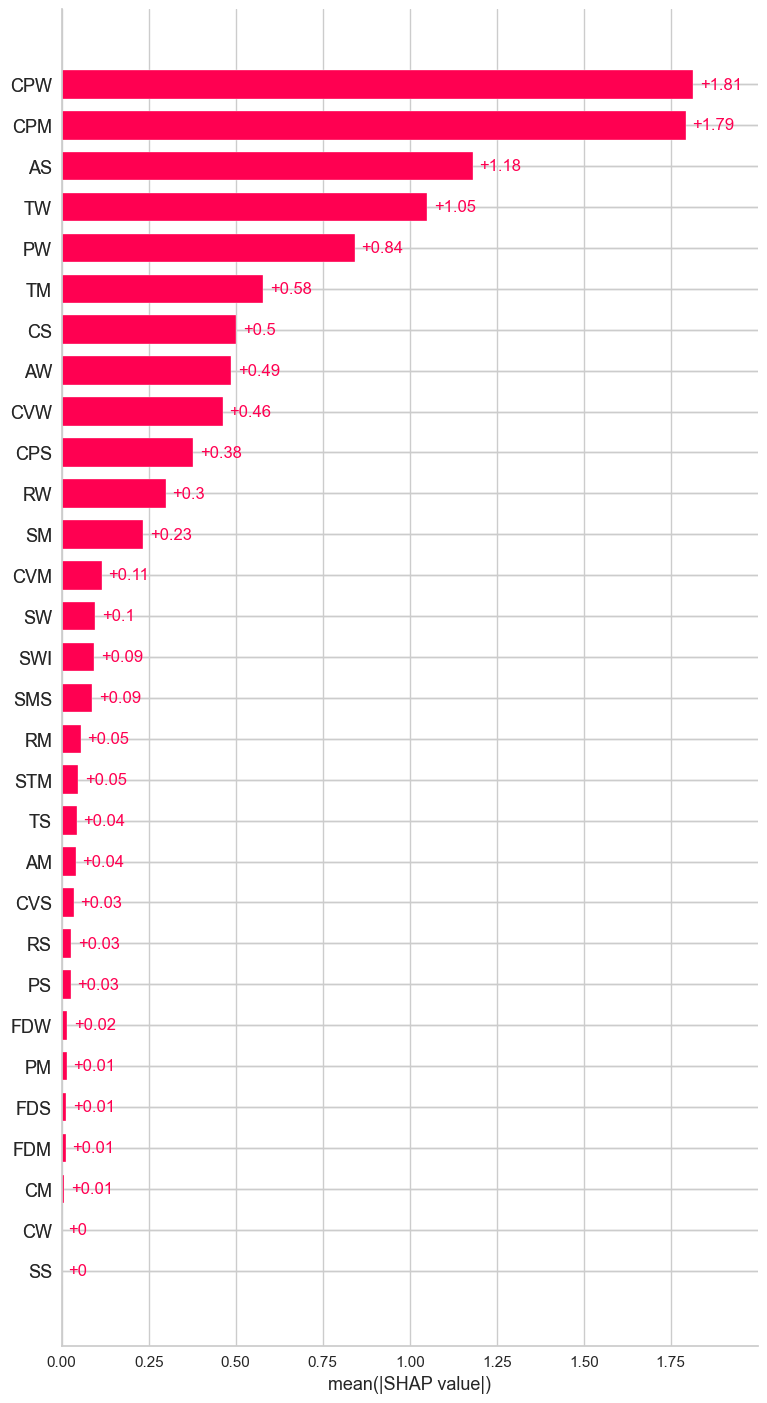

In [32]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

#### 4. Beeswarm Plot 

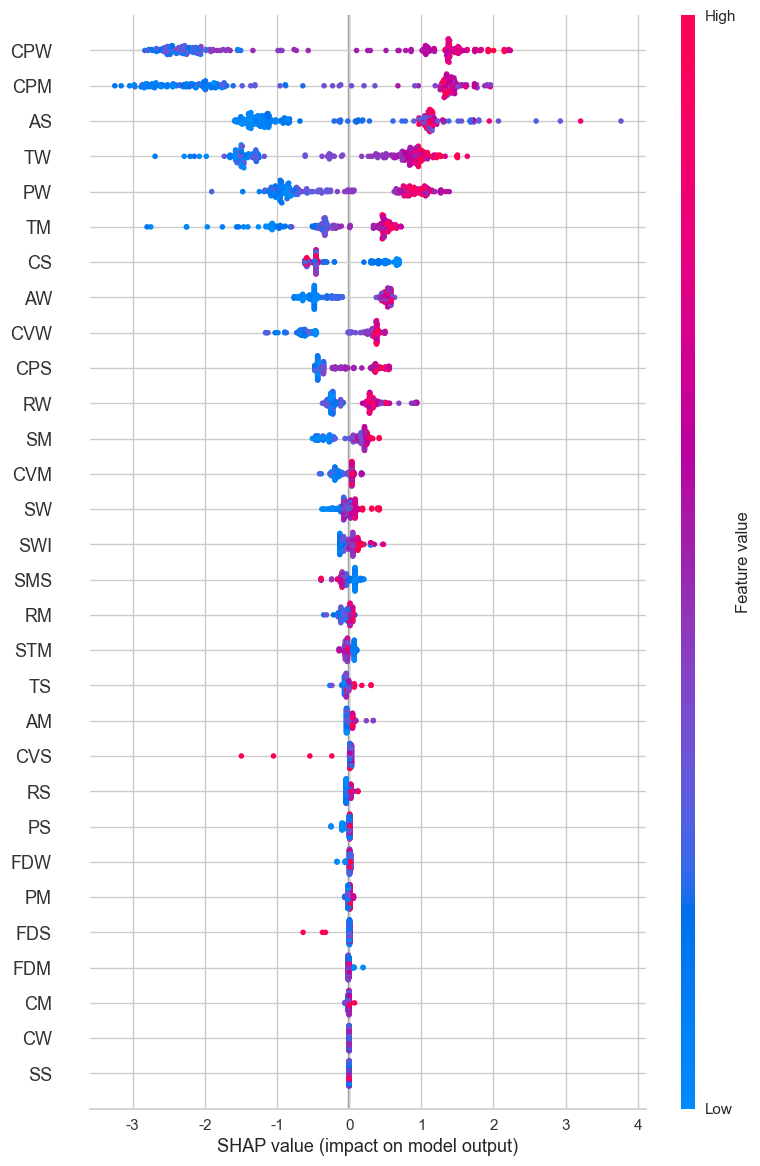

In [33]:
shap.plots.beeswarm(shap_values, max_display=len(shap_values.feature_names))

#### 5. Dependence Plots

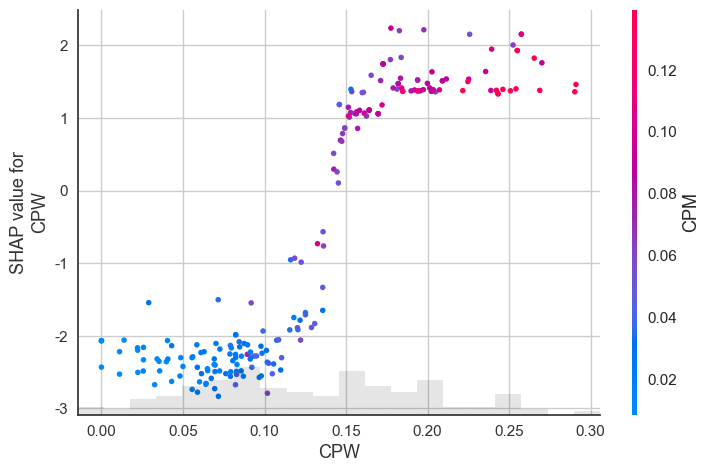

In [34]:
shap.plots.scatter(shap_values[:, "CPW"],
                   color=shap_values[:, "CPM"])

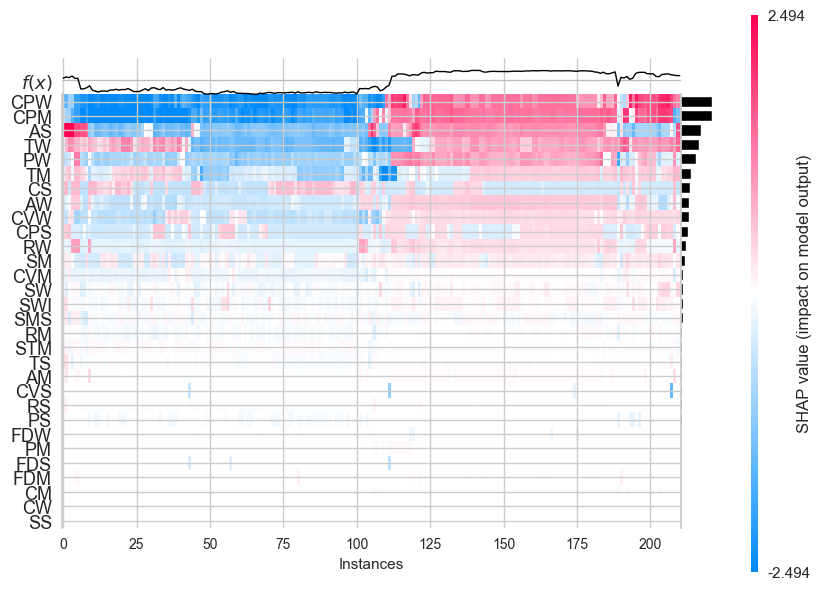

<Axes: xlabel='Instances'>

In [35]:
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

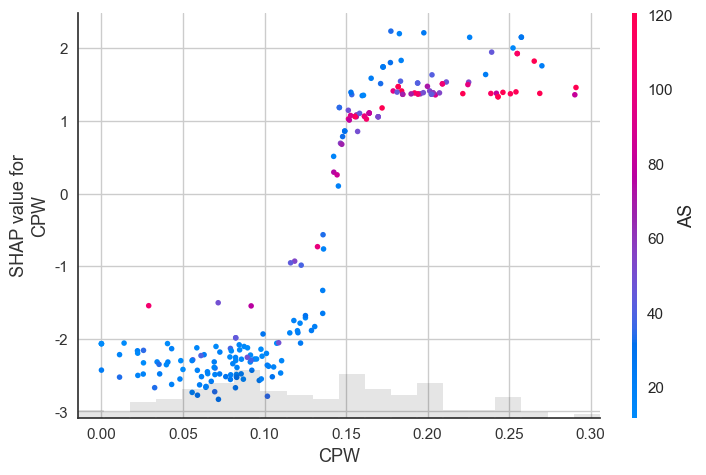

In [36]:
shap.plots.scatter(shap_values[:, "CPW"], color=shap_values)

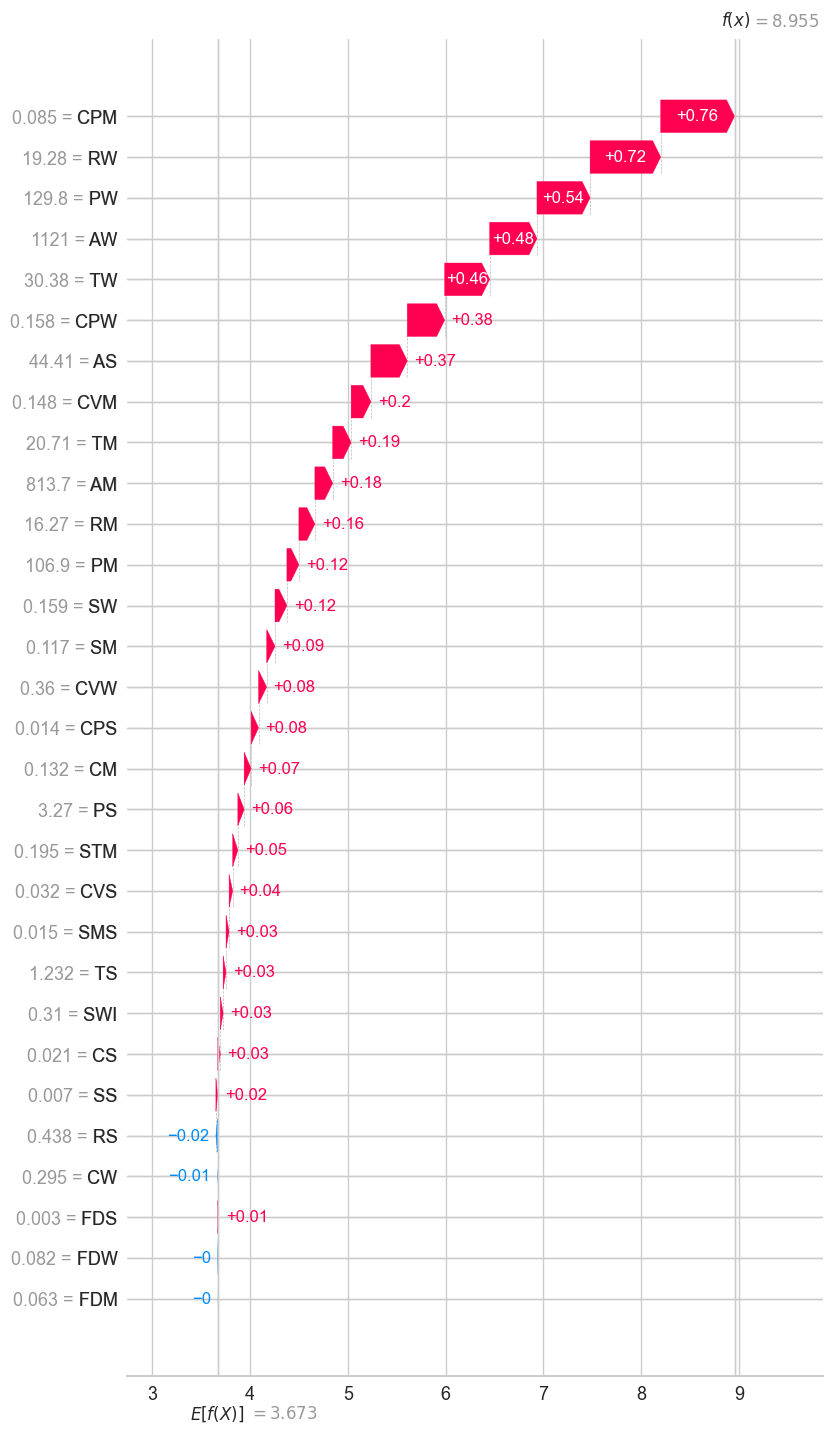

In [41]:
shap.plots.waterfall(shap_values[0], max_display=len(shap_values.feature_names))

In [42]:
shap.plots.force(shap_values[0])

In [43]:
shap.plots.force(shap_values[0:100])

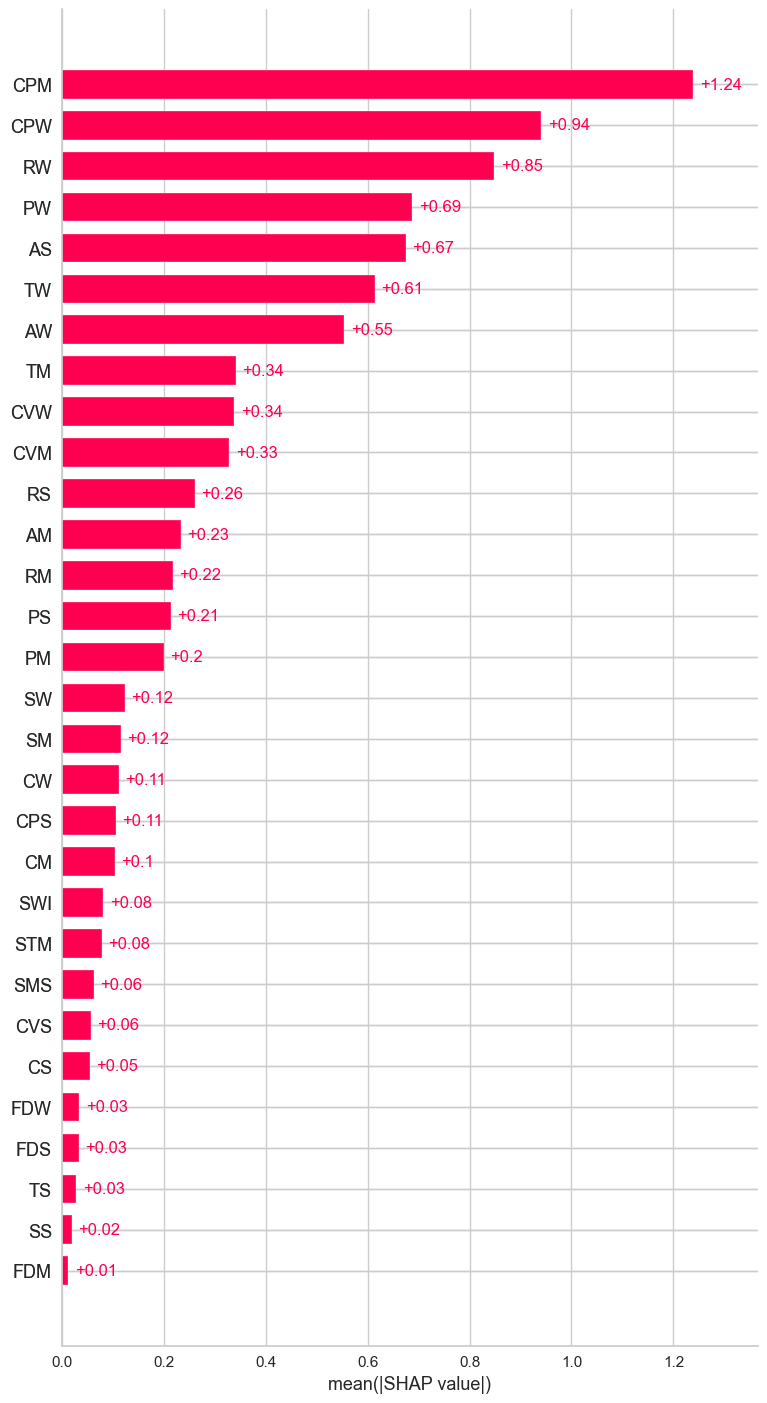

In [44]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

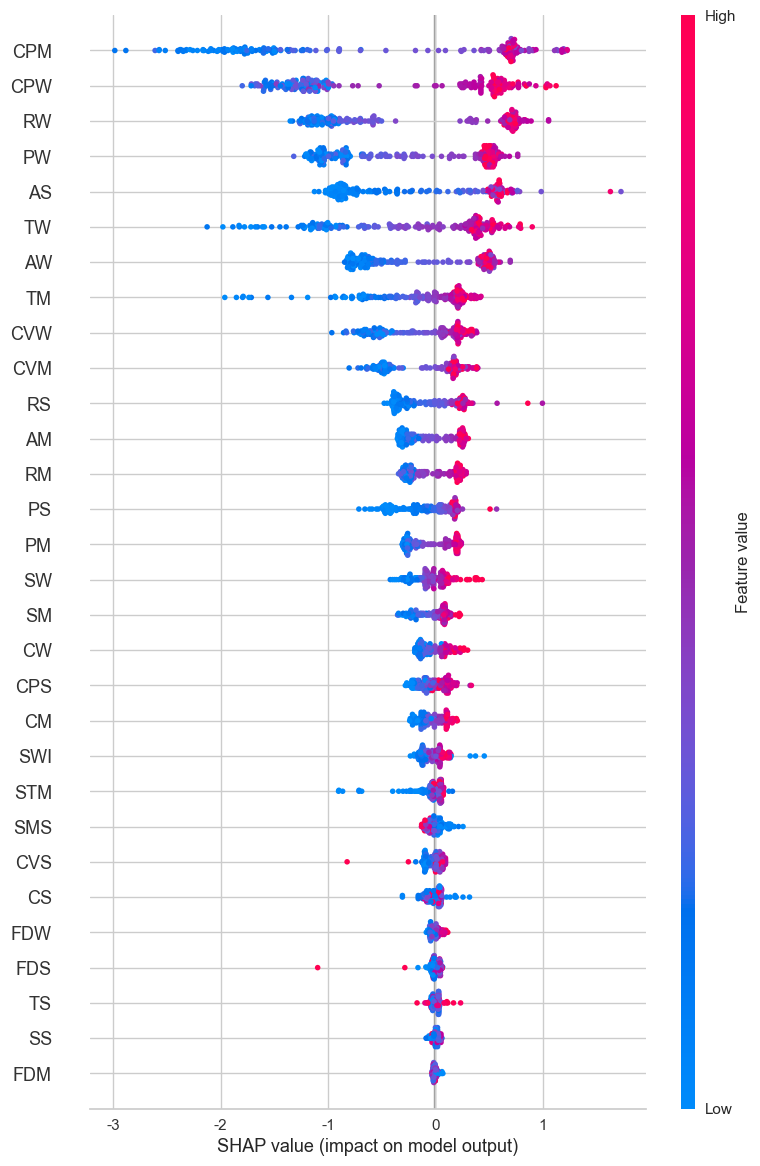

In [45]:
shap.plots.beeswarm(shap_values, max_display=len(shap_values.feature_names))

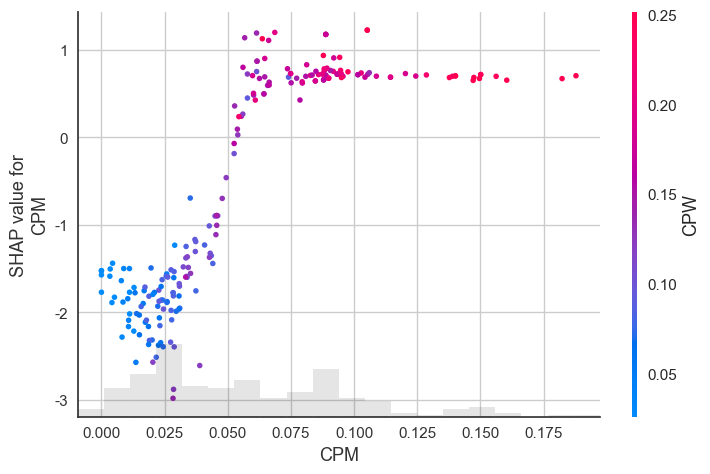

In [46]:
shap.plots.scatter(shap_values[:, "CPM"],
                   color=shap_values[:, "CPW"])

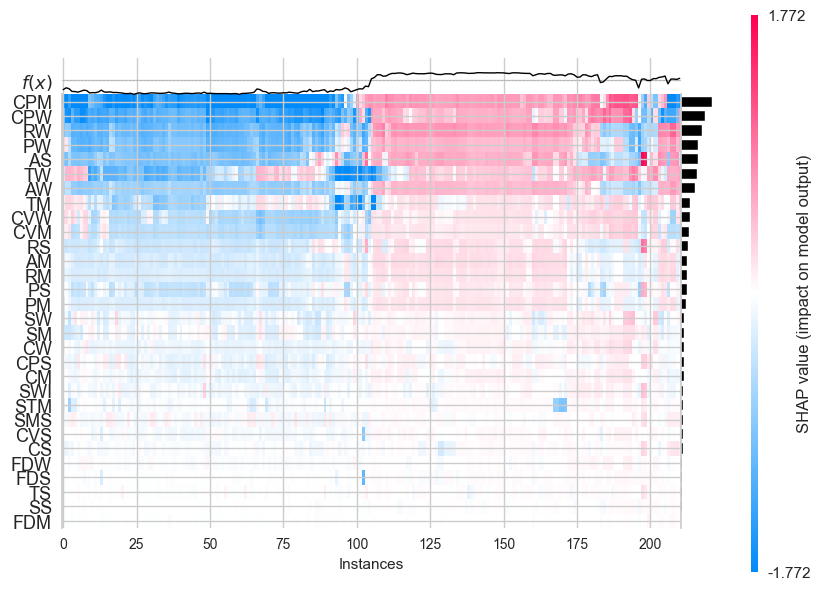

<Axes: xlabel='Instances'>

In [47]:
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

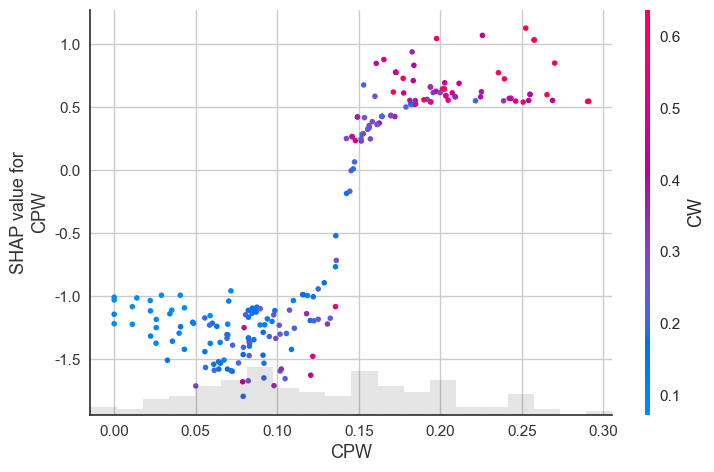

In [48]:
shap.plots.scatter(shap_values[:, "CPW"], color=shap_values)

## 2. Satcking with Best Base Models

In [49]:
stacking_bbm= stack_models(estimator_list = [qda, ridge, et, gbc, ada], meta_model = lr())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9770,0.9994,0.9839,0.9839,0.9839,0.9439,0.9439
1,0.9885,1.0000,1.0000,0.9841,0.9920,0.9716,0.9720
2,0.9885,1.0000,1.0000,0.9841,0.9920,0.9716,0.9720
3,0.9885,1.0000,1.0000,0.9841,0.9920,0.9716,0.9720
4,0.9885,0.9987,1.0000,0.9841,0.9920,0.9716,0.9720
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9884,1.0000,1.0000,0.9839,0.9919,0.9715,0.9719
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9884,1.0000,0.9836,1.0000,0.9917,0.9721,0.9725


In [50]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [51]:
explainer=shap.Explainer(lgbm)
shap_values=explainer(X_test)

In [52]:
np.shape(shap_values.values)

(211, 30)

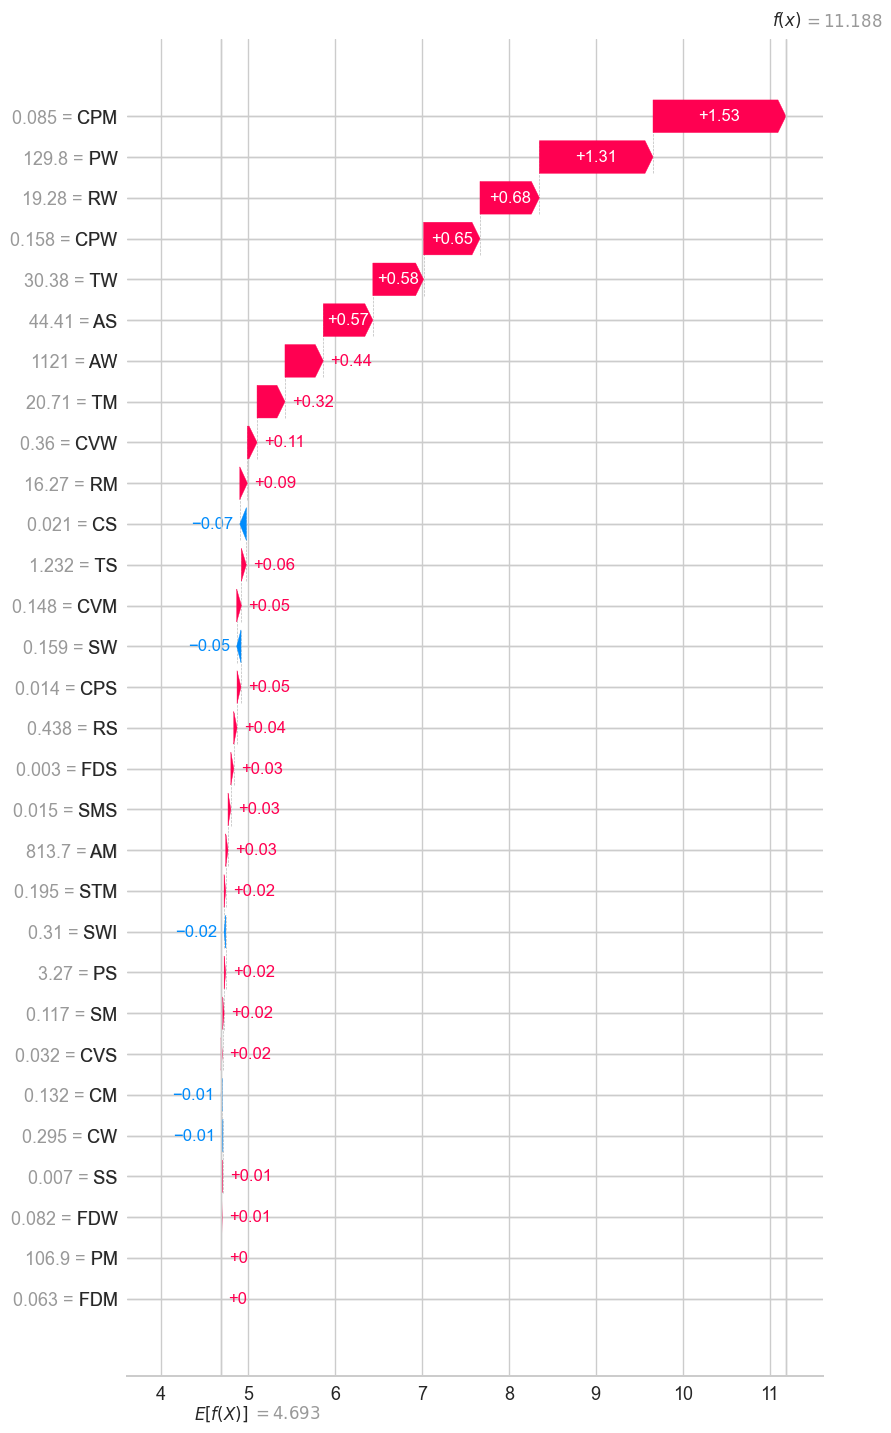

In [53]:
shap.plots.waterfall(shap_values[0], max_display=len(shap_values.feature_names))

In [54]:
shap.plots.force(shap_values[0])

In [55]:
shap.plots.force(shap_values[0:100])

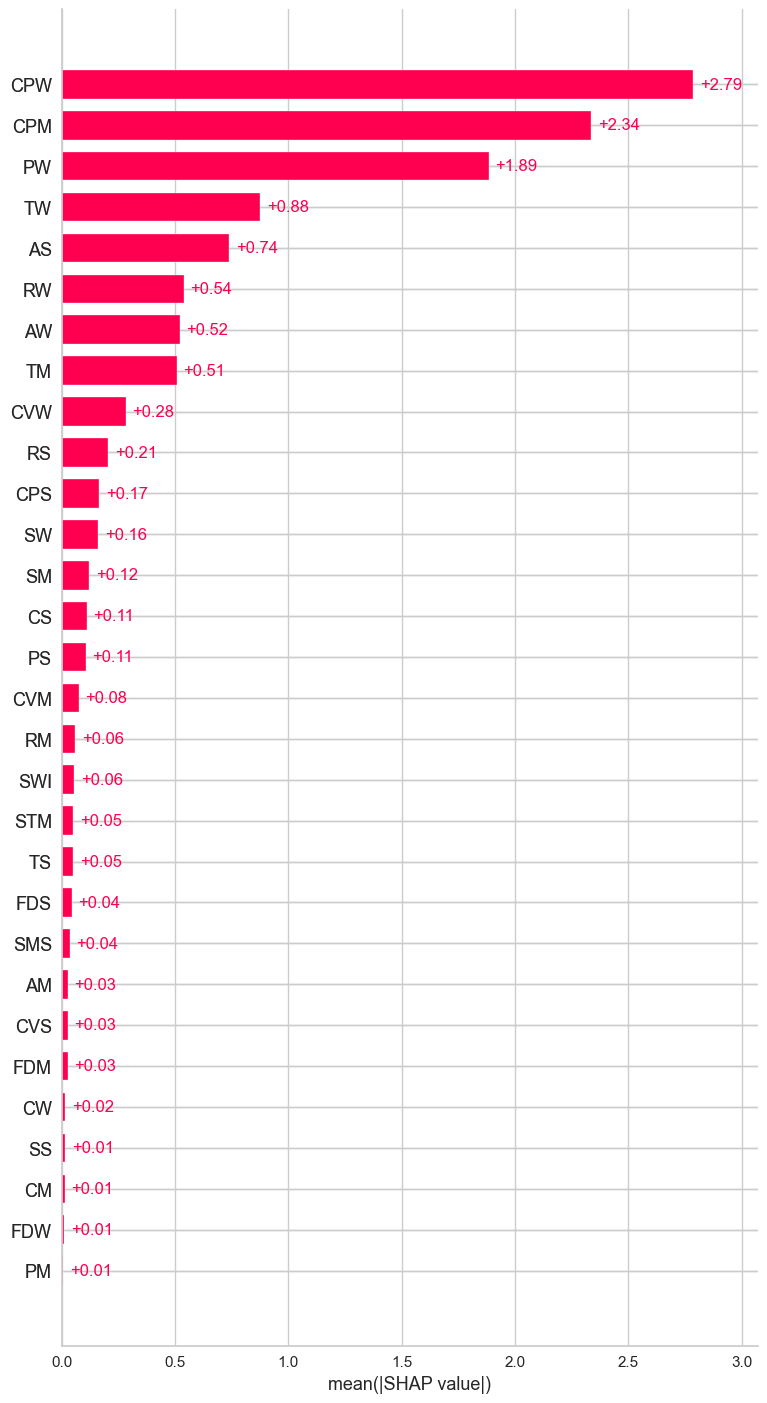

In [56]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

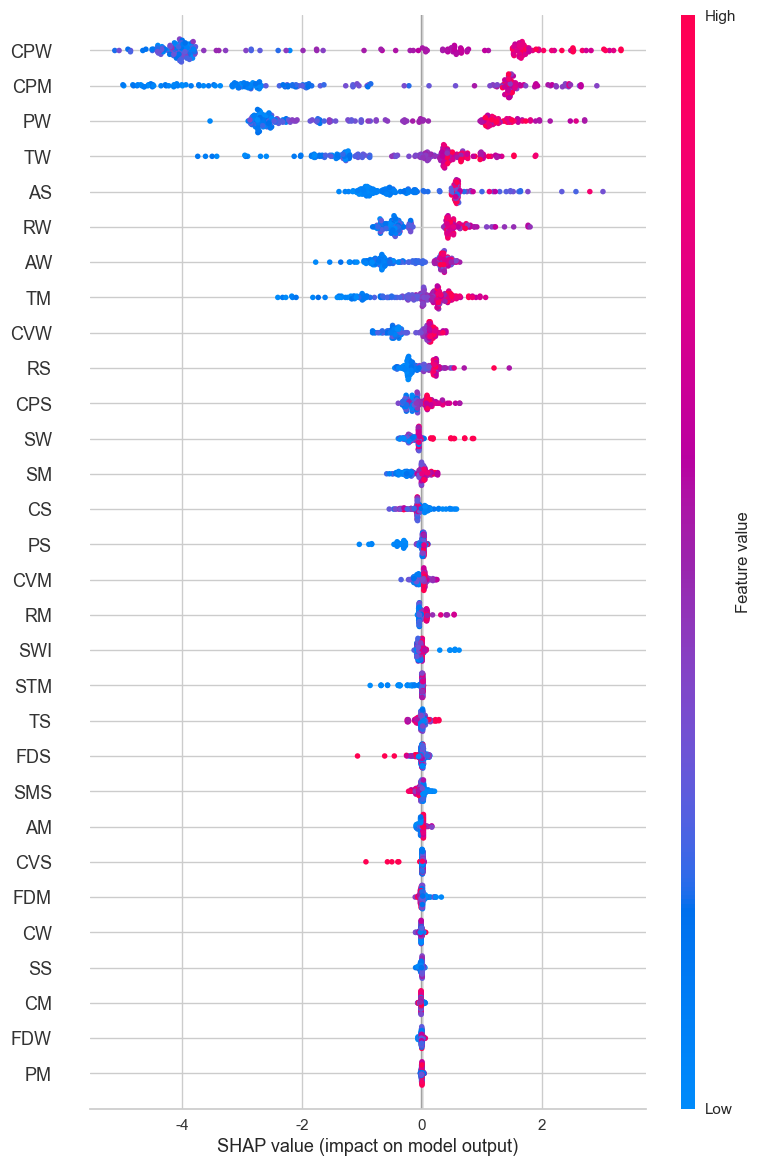

In [57]:
shap.plots.beeswarm(shap_values, max_display=len(shap_values.feature_names))

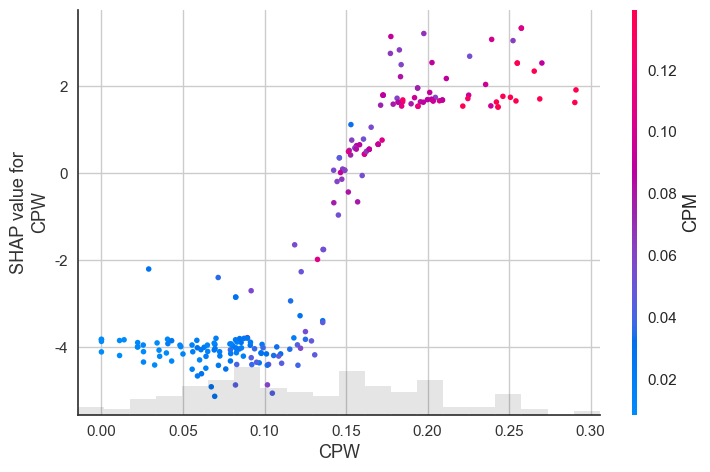

In [58]:
shap.plots.scatter(shap_values[:, "CPW"],
                   color=shap_values[:, "CPM"])

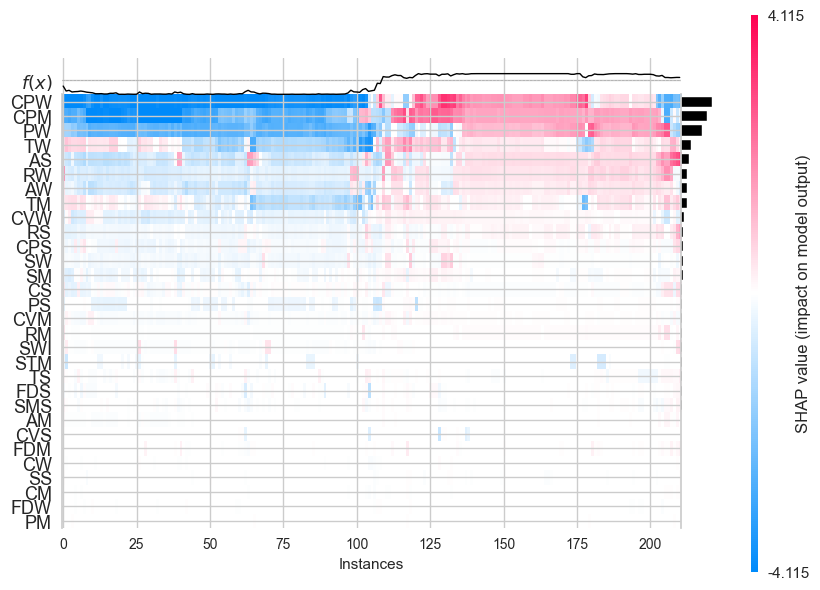

<Axes: xlabel='Instances'>

In [59]:
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

## End of the Experiment